## Final
- Author: Shelar Rohit
- Date: 14/03/2021

-
- For the Ozone data from the R package mlbench try the following machine learning prediction algorithm that is useful for feature selection.
- Read the paper Feature Selection with the Boruta Package and implement the algorithm.
- Which features are most important as determined by the Boruta RandomForest Algorithm?

### Answer : Code and Comments

In [44]:
# ! pip install boruta
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
from boruta import BorutaPy

In [76]:
# Loading Oxone Dataset
df = pd.read_csv('Ozone.csv')

In [77]:
df.head()

,Month,DayOfMonth,DayOfWeek,OzoneReading,PressureHeight,WindSpeed,Humidity,TemperatureSandburg,TemperatureElMonte,InversionBaseHeight,PressureGradient,InversionTemperature,Visibility
0,1,1,4,3.0,5480.0,8,20.0,NaN,NaN,5000.0,-15.0,30.56,200
1,1,2,5,3.0,5660.0,6,NaN,38.0,NaN,NaN,-14.0,NaN,300
2,1,3,6,3.0,5710.0,4,28.0,40.0,NaN,2693.0,-25.0,47.66,250
3,1,4,7,5.0,5700.0,3,37.0,45.0,NaN,590.0,-24.0,55.04,100
4,1,5,1,5.0,5760.0,3,51.0,54.0,45.32,1450.0,25.0,57.02,60


In [79]:
print('Size of Dataset: ',len(df))

Size of Dataset:  366


In [80]:
# Keep Dataset only with Non Null values in Target column 
df = df[df['OzoneReading'].notna()]

In [81]:
print('Refined Size of Dataset: ',len(df))

Refined Size of Dataset:  361


In [82]:
# Check for null value count in all columns of dataset
df.isna().sum()

Month                     0
DayOfMonth                0
DayOfWeek                 0
OzoneReading              0
PressureHeight           12
WindSpeed                 0
Humidity                 15
TemperatureSandburg       2
TemperatureElMonte      137
InversionBaseHeight      15
PressureGradient          1
InversionTemperature     14
Visibility                0
dtype: int64

In [83]:
# Fill Null values with Median of respective columns
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [84]:
# Re check for null value count
df.isna().sum()

Month                   0
DayOfMonth              0
DayOfWeek               0
OzoneReading            0
PressureHeight          0
WindSpeed               0
Humidity                0
TemperatureSandburg     0
TemperatureElMonte      0
InversionBaseHeight     0
PressureGradient        0
InversionTemperature    0
Visibility              0
dtype: int64

In [85]:
# Split Data into train and test dataset 
from sklearn.model_selection import train_test_split
X =  df.drop(columns='OzoneReading')
X = X.values
y = df['OzoneReading'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
# Declare the RandomForestRegressor to use in boruta

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from boruta import BorutaPy
forest = RandomForestRegressor(n_estimators=100, max_depth=12)

In [87]:
# Apply boruta for feature selection 

feat_selector = BorutaPy(forest, n_estimators='auto',verbose=2, random_state=42)
feat_selector.fit(X, y)
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	5
Iteration:

In [88]:
# features importance as determined by the Boruta RandomForest Algorithm

feature_ranks = list(zip(df.columns,feat_selector.ranking_,feat_selector.support_))
for feature in feature_ranks: print('Feature: {:<25} Rank: {},  Keep: {}'.format(feature[0], feature[1], feature[2]))

Feature: Month                     Rank: 3,  Keep: False
Feature: DayOfMonth                Rank: 5,  Keep: False
Feature: DayOfWeek                 Rank: 6,  Keep: False
Feature: OzoneReading              Rank: 4,  Keep: False
Feature: PressureHeight            Rank: 7,  Keep: False
Feature: WindSpeed                 Rank: 1,  Keep: True
Feature: Humidity                  Rank: 1,  Keep: True
Feature: TemperatureSandburg       Rank: 2,  Keep: False
Feature: TemperatureElMonte        Rank: 1,  Keep: True
Feature: InversionBaseHeight       Rank: 1,  Keep: True
Feature: PressureGradient          Rank: 1,  Keep: True
Feature: InversionTemperature      Rank: 1,  Keep: True


In [89]:
# Droping the columns where Baruta declared Keep as False
X = df.drop(columns=['Month','DayOfMonth','DayOfWeek','PressureHeight','OzoneReading','TemperatureSandburg'])

In [90]:
# Creating a training and test Dataset for Model Creation 
y = df['OzoneReading'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Model creation RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=12)
forest = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test) 

In [93]:
# Accuracy of the RandomForestRegressor

In [94]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.950200869946235
Mean Squared Error: 15.403158793110359
Root Mean Squared Error: 3.9246858209429147


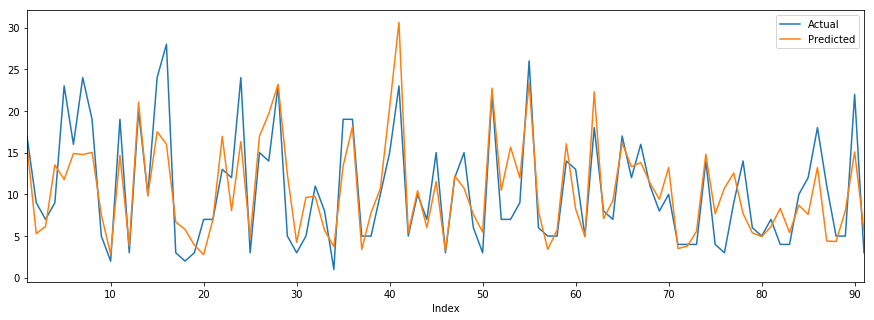

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({"Index": [x for x in range(1,92)],
                   "Actual" : y_test,
                   "Predicted" : y_pred })

df.plot(x="Index", y=["Actual", "Predicted"], figsize=(15,5))
plt.show()